In [ ]:
import numpy as np
X = np.array([[1, 1], [2, 1], [3, 1.2], [4, 1], [5, 0.8], [6, 1]])
from sklearn.decomposition import NMF
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_
print("***************************************************************************************")
print(W)
print("***************************************************************************************")
print(H)

# Set the number of components (i.e., basis functions) to 4
n_components = 4

# Set the maximum number of iterations to 10000 and enable verbose output
max_iter = 10000
model = NMF(n_components=n_components, max_iter=max_iter, verbose=True)
# The verbose=True parameter in the NMF constructor enables verbose output, which means that the NMF algorithm will print progress updates and other information during the optimization process.

# Scale the input data to have zero mean and unit variance

# This is often done to ensure that all channels have equal importance in the analysis
#scaled_data1 = scale(scaled_data1)

# Fit the NMF model to the scaled data
# The fit_transform method returns the activation coefficients (W) and basis functions (H)
W = model.fit_transform(emg1 - np.min(emg1))
H = model.components_

In [ ]:
!pip install utils datasets numpy scipy seaborn matplotlib gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 15.3 MB/s eta 0:00:00


In [ ]:
from helper_functions.get_collected_data import *
import scipy.io

x = GetEMGData("Collected_Data/Subject_1/WA_thumb.mat")
for i in x:
    print(i.shape)

# for i in dy[7][0][0][3][0]:
#   print(i.item())

# for i in dy[6][0][0][5][0]:
#   print(i.item())

In [ ]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, TensorDataset

from utils import *

import datasets
from datasets import load_dataset, load_metric

import scipy
import numpy as np
import pandas as pd

import pickle
import gdown
import os

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [ ]:
def load_data_from_drive(file_url, output_path):
    # Extract file ID from URL
    file_id = file_url.split("/d/")[1].split("/view")[0]

    # Construct download link
    download_url = f"https://drive.google.com/uc?id={file_id}"

    # Download file
    gdown.download(download_url, output_path, quiet=False)

# Load the data from my drive
load_data_from_drive("https://drive.google.com/file/d/1bhrvIGgsKgndZZeNOoXaOIZU8WqyN3in/view?usp=drive_link", "E1.mat")
load_data_from_drive("https://drive.google.com/file/d/1aW7bYXEzp_0hytdizV_oo5n7C8woPlz6/view?usp=drive_link", "E2.mat")

Downloading...
From: https://drive.google.com/uc?id=1bhrvIGgsKgndZZeNOoXaOIZU8WqyN3in
To: /content/E1.mat
100%|██████████| 151M/151M [00:03<00:00, 44.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1aW7bYXEzp_0hytdizV_oo5n7C8woPlz6
To: /content/E2.mat
100%|██████████| 244M/244M [00:06<00:00, 36.9MB/s]


In [ ]:
# Import the data
df1 = scipy.io.loadmat("E1.mat")
df2 = scipy.io.loadmat("E2.mat")

emg1 = pd.DataFrame(df1["emg"])
emg2 = pd.DataFrame(df2["emg"])

acc1 = pd.DataFrame(df1["acc"])
acc2 = pd.DataFrame(df2["acc"])

glove1 = pd.DataFrame(df1["glove"])
glove2 = pd.DataFrame(df2["glove"])

stimulus1 = pd.DataFrame(df1["stimulus"])
stimulus2 = pd.DataFrame(df2["stimulus"])

restimulus1 = pd.DataFrame(df1["restimulus"])
restimulus2 = pd.DataFrame(df2["restimulus"])

repetition1 = pd.DataFrame(df1["repetition"])
repetition2 = pd.DataFrame(df2["repetition"])

rerepetition1 = pd.DataFrame(df1["rerepetition"])
rerepetition2 = pd.DataFrame(df2["rerepetition"])

In [ ]:
# We will use a Linear model to find the angles of our joints

## Maximum angles for each corresponding joint
Max_angles = np.array([
    [15, 50, 80, 0, 0, 120, 90, 0, 120, 90, 90, 0, 120, 90, 90, 0, 120, 90, 90, 0, 0, 0]
]).reshape(-1, 1)

def GetAngles(gloves_data, max_angles):
    # calculate the min and max of the data
    min_val = gloves_data.min()
    max_val = gloves_data.max()

    # normalize it
    Normalized_data = ((gloves_data - min_val) / (max_val - min_val))

    # find the angles
    fing_angles = np.array(Normalized_data) * max_angles.T

    # convert to DataFrame
    fing_gloves = pd.DataFrame(fing_angles, columns = [f"angles_glove_{i+1}" for i in range(22)])

    return (fing_gloves)

E1 = GetAngles(glove1, Max_angles)
E2 = GetAngles(glove2, Max_angles)

In [ ]:
# Prepare the data for training

# Drop unused signals
y_train1 = E1.drop(["angles_glove_4", "angles_glove_5", "angles_glove_8", "angles_glove_12", "angles_glove_16", "angles_glove_20", "angles_glove_21", "angles_glove_22"], axis = 1)
y_train2 = E2.drop(["angles_glove_4", "angles_glove_5", "angles_glove_8", "angles_glove_12", "angles_glove_16", "angles_glove_20", "angles_glove_21", "angles_glove_22"], axis = 1)

# Merge Excersice 1 and 2
y_train = pd.concat([y_train1 ,y_train2])
X_train = pd.concat([emg1, emg2])

print(y_train1.shape)
print(y_train2.shape)

print(X_train.shape)
print(y_train.shape)

# NOTE: I will use the collected data to fine tuning the model we are going to build so we don't need test data in this phase

(1808331, 14)
(2553289, 14)
(4361620, 12)
(4361620, 14)


In [ ]:
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)

## training

### DNN Approach

In [ ]:
# Define the device to work on
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# device0 = torch.device('cuda:0')
# device1 = torch.device('cuda:1')
# device2 = torch.device('cuda:2')
# device3 = torch.device('cuda:3')
# !export CUDA_VISIBLE_DEVICES=0,1,2,3

print(device)
print(torch.cuda.device_count())

cuda
1


In [ ]:
class my_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.relu = nn.ReLU()
        self.drop20 = nn.Dropout(0.2)
        self.drop50 = nn.Dropout(0.5)
        self.layer1 = nn.Linear(in_features = 12, out_features = 128)
        self.layer2 = nn.Linear(in_features = 128, out_features = 256)
        self.layer3 = nn.Linear(in_features = 256, out_features = 1024)
        self.layer4 = nn.Linear(in_features = 1024, out_features = 4096)
        self.layer5 = nn.Linear(in_features = 4096, out_features = 4096)
        self.layer6 = nn.Linear(in_features = 4096, out_features = 2048)
        self.layer7 = nn.Linear(in_features = 2048, out_features = 512)
        self.layer8 = nn.Linear(in_features = 512, out_features = 14)

    def forward(self, inp):
        x = self.relu(self.layer1(inp))
        x = self.relu(self.layer2(x))
        x = self.drop20(x)
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.drop20(x)
        x = self.relu(self.layer5(x))
        x = self.drop50(x)
        x = self.relu(self.layer6(x))
        x = self.drop20(x)
        x = self.relu(self.layer7(x))
        x = self.layer8(x)
        return (x)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Build and define your model
model = my_model()
model.to(device)

# Define the Loss function and the Optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params = model.parameters())

# Specify the number of epochs
epochs = 10

# Convert the Dataframe to Tensor
train = torch.tensor(X_train.values.astype(np.float32))
train_target = torch.tensor(y_train.values.astype(np.float32))

train_data = TensorDataset(train, train_target)

batch_size = 50000
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Instantiate lists to save the loss values during the training process
DNN_app = []
epoch_count = []

for epoch in range(epochs):

    train_loss = 0

    # Training mode
    model.train()
    for train_x, train_y in train_loader:

        train_x = train_x.to(device)
        train_y = train_y.to(device)

        # Feedforward
        y_pred = model(train_x)

        # At the start of each ****** Epoch
        optimizer.zero_grad()

        # Calculate the loss function
        loss = loss_fn(y_pred, train_y)
        train_loss += loss

        # Do the back probagation and update the parameters
        loss.backward()
        optimizer.step()

    train_loss /= len(train_loader)

    # Evaluation mode
    # model.eval()

    # with torch.inference_mode():

    #     loss_test = 0

    #     for test_x, test_y in test_loader:

    #         test_x, test_y = test_x.to(device), test_y.to(device)

    #         # Feedforward again for the evaluation phase
    #         y_pred_test = model(test_x)

    #         # Calculate the loss for the test dataset
    #         loss_test += loss_fn(y_pred_test, test_y)

    #     loss_test /= len(test_loader)

    # # Append loss values for the training process
    DNN_app.append(train_loss.cpu().detach().numpy())
    # test_loss_values.append(loss_test) # .cpu().detach().numpy()
    epoch_count.append(epoch)
    print(f"Epoch : {epoch + 1} | train_Loss: {train_loss}") # | test_Loss: {loss_test}")

Epoch : 1 | train_Loss: 853.97705078125
Epoch : 2 | train_Loss: 320.29229736328125
Epoch : 3 | train_Loss: 319.8642578125
Epoch : 4 | train_Loss: 319.7086181640625
Epoch : 5 | train_Loss: 319.63433837890625
Epoch : 6 | train_Loss: 319.5901794433594
Epoch : 7 | train_Loss: 319.5746765136719
Epoch : 8 | train_Loss: 319.54571533203125
Epoch : 9 | train_Loss: 319.4148254394531
Epoch : 10 | train_Loss: 319.4909362792969


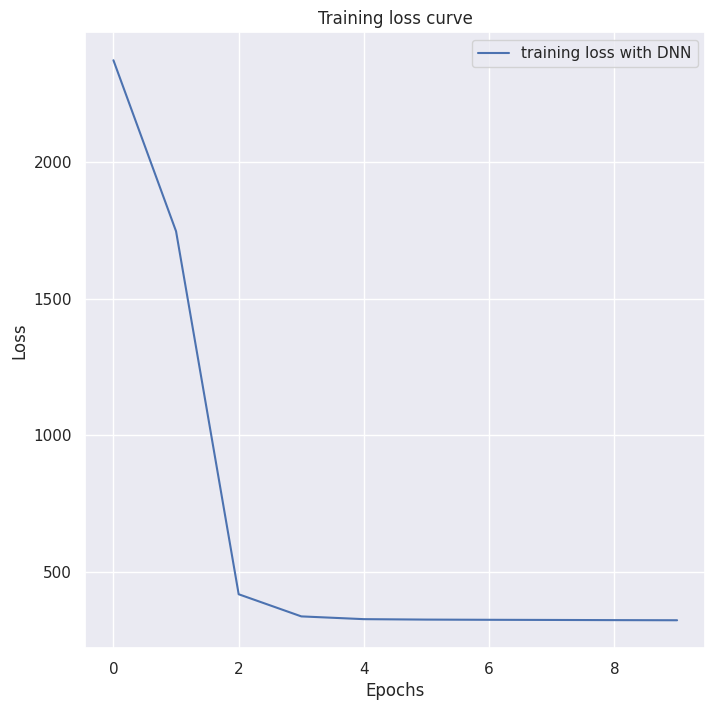

In [ ]:
plt.figure(figsize = (8, 8))

plt.plot(epoch_count, DNN_app, label = "training loss with DNN")

plt.title("Training loss curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

### LSTM-CNN Approach

In [ ]:
# Prepare the data for sequential modelling

# Drop unused signals
E01 = E1.drop(["angles_glove_4", "angles_glove_5", "angles_glove_8", "angles_glove_12", "angles_glove_16", "angles_glove_20", "angles_glove_21", "angles_glove_22"], axis = 1)
E02 = E2.drop(["angles_glove_4", "angles_glove_5", "angles_glove_8", "angles_glove_12", "angles_glove_16", "angles_glove_20", "angles_glove_21", "angles_glove_22"], axis = 1)

y_train = pd.concat([E01 ,E02])
X_train = pd.concat([emg1, emg2])
st = pd.concat([stimulus1, stimulus2])
print(st.shape)

inall = []
indata = []
outall = []
outdata = []
insti = []

for i in range(stimulus1.shape[0]):
    if (i == 0):
        indata.append(np.array(X_train.iloc[i]))
        outdata.append(np.array(y_train.iloc[i]))
    elif (st.iloc[i].item() != st.iloc[i - 1].item()):
        insti.append(stimulus1.iloc[i - 1])
        inall.append(indata)
        outall.append(outdata)
        indata = []
        outdata = []
        indata.append(np.array(X_train.iloc[i]))
        outdata.append(np.array(y_train.iloc[i]))
    else:
        indata.append(np.array(X_train.iloc[i]))
        outdata.append(np.array(y_train.iloc[i]))

(4361620, 1)


### we can try two approaches padding to the maximum length and the other truncating to the smallest length and also we can keep the samples with motion only (half the data)

In [ ]:
# Determine the maximum sequence length
max_length = max(len(seq) for seq in inall)

# Pad the sequences with zeros
padded_data = []
for seq in inall:
    padded_seq = np.zeros((max_length, seq[0].shape[0]))
    padded_seq[:len(seq)] = seq
    padded_data.append(padded_seq)

# Convert the padded data into a NumPy array
padded_data = np.array(padded_data)

# Verify the shape of the padded data
print(padded_data.shape)
print(padded_data[1::2].shape)

# Save the arrays to files
np.save('X_train_padding.npy', padded_data)
np.save('X_train_padding_only_with_motion.npy', padded_data[1::2])

# Determine the maximum sequence length
max_length = max(len(seq) for seq in outall)

# Pad the sequences with zeros
padded_data = []
for seq in outall:
    padded_seq = np.zeros((max_length, seq[0].shape[0]))
    padded_seq[:len(seq)] = seq
    padded_data.append(padded_seq)

# Convert the padded data into a NumPy array
padded_data = np.array(padded_data)

# Verify the shape of the padded data
print(padded_data.shape)
print(padded_data[1::2].shape)

# Save the arrays to files
np.save('y_train_padding.npy', padded_data)
np.save('y_train_padding_only_with_motion.npy', padded_data[1::2])

(203, 12246, 12)
(101, 12246, 12)
(203, 12246, 14)
(101, 12246, 14)


In [ ]:
# Determine the minimum sequence length
min_length = min(len(seq) for seq in inall)

# Truncate the sequences with excess length
truncated_data = []
for seq in inall:
    truncated_seq = seq[:min_length]
    truncated_data.append(truncated_seq)

# Convert the Truncate data into a NumPy array
truncated_data = np.array(truncated_data)

# Verify the shape of the padded data
print(truncated_data.shape)

# Save the arrays to files
np.save('X_train_truncating.npy', truncated_data)

# Determine the minimum sequence length with only motion samples
min_length = min(len(seq) for seq in inall[1::2])

# Truncate the sequences with excess length
truncated_data = []
for seq in inall[1::2]:
    truncated_seq = seq[:min_length]
    truncated_data.append(truncated_seq)

# Convert the Truncate data into a NumPy array
truncated_data = np.array(truncated_data)

# Verify the shape of the padded data
print(truncated_data.shape)

# Save the arrays to files
np.save('X_train_truncating_only_with_motion.npy', truncated_data)

# Determine the minimum sequence length
min_length = min(len(seq) for seq in outall)

# Truncate the sequences with excess length
truncated_data = []
for seq in outall:
    truncated_seq = seq[:min_length]
    truncated_data.append(truncated_seq)

# Convert the Truncate data into a NumPy array
truncated_data = np.array(truncated_data)

# Verify the shape of the padded data
print(truncated_data.shape)

# Save the arrays to files
np.save('y_train_truncating.npy', truncated_data)

# Determine the minimum sequence length with only motion samples
min_length = min(len(seq) for seq in outall[1::2])

# Truncate the sequences with excess length
truncated_data = []
for seq in outall[1::2]:
    truncated_seq = seq[:min_length]
    truncated_data.append(truncated_seq)

# Convert the Truncate data into a NumPy array
truncated_data = np.array(truncated_data)

# Verify the shape of the padded data
print(truncated_data.shape)

# Save the arrays to files
np.save('y_train_truncating_only_with_motion.npy', truncated_data)

(203, 6498, 12)
(101, 10873, 12)
(203, 6498, 14)
(101, 10873, 14)


In [ ]:
# Define the input shape
input_shape = (6498, 12)

# Define the number of output features
output_features = 14

# Create a custom LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_shape, output_features):
        super(LSTMModel, self).__init__()
        self.num_layers = 1

        self.drop20 = nn.Dropout(0.2)
        self.drop50 = nn.Dropout(0.5)

        self.lstm1 = nn.LSTM(input_shape[1], 32, num_layers = self.num_layers, bidirectional = True, batch_first = True)
        self.lstm2 = nn.LSTM(64, 128, num_layers = self.num_layers, bidirectional = True, batch_first = True)
        self.lstm3 = nn.LSTM(256, 256, num_layers = self.num_layers, batch_first = True)

        self.fc_h1 = nn.Linear(256, 512)
        self.fc_h2 = nn.Linear(512, 2048)
        self.fc_h3 = nn.Linear(2048, 4096)

        self.fc_h4 = nn.Linear(4096, 4096)
        self.fc_h5 = nn.Linear(4096, 4096)

        self.fc_h6 = nn.Linear(4096, 1024)
        self.fc_h7 = nn.Linear(1024, 256)
        self.fc = nn.Linear(256, output_features)
        self.relu = nn.ReLU()

    def forward(self, x):
        h0 = torch.zeros(self.num_layers * 2, x.size(0), 32).to("cuda")
        c0 = torch.zeros(self.num_layers * 2, x.size(0), 32).to("cuda")

        h1 = torch.zeros(self.num_layers * 2, x.size(0), 128).to("cuda")
        c1 = torch.zeros(self.num_layers * 2, x.size(0), 128).to("cuda")

        h2 = torch.zeros(self.num_layers, x.size(0), 256).to("cuda")
        c2 = torch.zeros(self.num_layers, x.size(0), 256).to("cuda")

        x, _ = self.lstm1(x, (h0, c0))
        x, _ = self.lstm2(x, (h1, c1))
        x, _ = self.lstm3(x, (h2, c2))

        x = self.relu(self.fc_h1(x))
        x = self.relu(self.fc_h2(x))
        x = self.relu(self.fc_h3(x))
        x = self.drop50(x)
        x = self.relu(self.fc_h4(x))
        x = self.drop20(x)
        x = self.relu(self.fc_h5(x))
        x = self.drop20(x)
        x = self.relu(self.fc_h6(x))
        x = self.drop20(x)
        x = self.relu(self.fc_h7(x))
        x = self.fc(x)

        return x
"""
the shape of the x variable after each layer:
                                                torch.Size([4, 6498, 12])
                                                torch.Size([4, 6498, 64])
                                                torch.Size([4, 6498, 256])
                                                torch.Size([4, 6498, 256])

                                                torch.Size([4, 6498, 512])
                                                torch.Size([4, 6498, 2048])
                                                torch.Size([4, 6498, 4096])
                                                torch.Size([4, 6498, 4096])
                                                torch.Size([4, 6498, 4096])
                                                torch.Size([4, 6498, 1024])
                                                torch.Size([4, 6498, 256])
                                                torch.Size([4, 6498, 14])
"""

'\nthe shape of the x variable after each layer:\n                                                torch.Size([4, 6498, 12])\n                                                torch.Size([4, 6498, 64])\n                                                torch.Size([4, 6498, 256])\n                                                torch.Size([4, 6498, 256])\n\n                                                torch.Size([4, 6498, 512])\n                                                torch.Size([4, 6498, 2048])\n                                                torch.Size([4, 6498, 4096])\n                                                torch.Size([4, 6498, 4096])\n                                                torch.Size([4, 6498, 4096])\n                                                torch.Size([4, 6498, 1024])\n                                                torch.Size([4, 6498, 256])\n                                                torch.Size([4, 6498, 14])\n'

In [ ]:
# Instantiate the model
model = LSTMModel(input_shape, output_features).to('cuda')

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# Load your input and output data
x_train = np.load("X_train_truncating.npy")
y_train = np.load("y_train_truncating.npy")

# Convert the data to PyTorch tensors
x_train = torch.tensor(x_train).float()
y_train = torch.tensor(y_train).float()

train_data = TensorDataset(x_train, y_train)

batch_size = 4
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
print(len(train_loader))

lstm_apptr_all = []
epoch_count = []

# Train the model for 10 epochs
for epoch in range(10):
    train_loss = 0
    for x_train, y_train in train_loader:

        x_train, y_train = x_train.to('cuda'), y_train.to('cuda')

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(x_train)

        y_pred = y_pred.reshape(-1, 14).to('cuda')
        y_train = y_train.reshape(-1, 14).to('cuda')

        # Compute the loss
        loss = criterion(y_pred, y_train)
        train_loss += loss

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()
    train_loss /= len(train_loader)

    # Print the loss
    print(f'Epoch: {epoch+1}, Loss: {train_loss:.4f}')
    lstm_apptr_all.append(train_loss.cpu().detach().numpy())
    epoch_count.append(epoch)

51
Epoch: 1, Loss: 1058.3275
Epoch: 2, Loss: 432.7213
Epoch: 3, Loss: 371.9357
Epoch: 4, Loss: 373.8457
Epoch: 5, Loss: 438.3596
Epoch: 6, Loss: 412.7009
Epoch: 7, Loss: 415.5259
Epoch: 8, Loss: 392.8301
Epoch: 9, Loss: 438.9840
Epoch: 10, Loss: 370.3779


In [ ]:
# Instantiate the model
model = LSTMModel(input_shape, output_features).to('cuda')

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# Load your input and output data
x_train = np.load("X_train_truncating_only_with_motion.npy")
y_train = np.load("y_train_truncating_only_with_motion.npy")

# Convert the data to PyTorch tensors
x_train = torch.tensor(x_train).float()
y_train = torch.tensor(y_train).float()

train_data = TensorDataset(x_train, y_train)

batch_size = 4
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
print(len(train_loader))

lstm_apptr_motion = []
epoch_count = []

# Train the model for 10 epochs
for epoch in range(10):
    train_loss = 0
    for x_train, y_train in train_loader:

        x_train, y_train = x_train.to('cuda'), y_train.to('cuda')

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(x_train)

        y_pred = y_pred.reshape(-1, 14).to('cuda')
        y_train = y_train.reshape(-1, 14).to('cuda')

        # Compute the loss
        loss = criterion(y_pred, y_train)
        train_loss += loss

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()
    train_loss /= len(train_loader)

    # Print the loss
    print(f'Epoch: {epoch+1}, Loss: {train_loss:.4f}')
    lstm_apptr_motion.append(train_loss.cpu().detach().numpy())
    epoch_count.append(epoch)

26
Epoch: 1, Loss: 1762.5869
Epoch: 2, Loss: 620.0256
Epoch: 3, Loss: 595.9685
Epoch: 4, Loss: 535.1053
Epoch: 5, Loss: 560.7103
Epoch: 6, Loss: 559.6215
Epoch: 7, Loss: 647.3848
Epoch: 8, Loss: 593.0645
Epoch: 9, Loss: 555.3662
Epoch: 10, Loss: 577.4777


In [ ]:
# Instantiate the model
model = LSTMModel(input_shape, output_features).to('cuda')

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# Load your input and output data
x_train = np.load("X_train_padding.npy")
y_train = np.load("y_train_padding.npy")

# Convert the data to PyTorch tensors
x_train = torch.tensor(x_train).float()
y_train = torch.tensor(y_train).float()

train_data = TensorDataset(x_train, y_train)

batch_size = 4
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
print(len(train_loader))

lstm_apppa_all = []
epoch_count = []

# Train the model for 10 epochs
for epoch in range(10):
    train_loss = 0
    for x_train, y_train in train_loader:

        x_train, y_train = x_train.to('cuda'), y_train.to('cuda')

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(x_train)

        y_pred = y_pred.reshape(-1, 14).to('cuda')
        y_train = y_train.reshape(-1, 14).to('cuda')

        # Compute the loss
        loss = criterion(y_pred, y_train)
        train_loss += loss

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()

    train_loss /= len(train_loader)

    # Print the loss
    print(f'Epoch: {epoch+1}, Loss: {train_loss:.4f}')
    lstm_apppa_all.append(train_loss.cpu().detach().numpy())
    epoch_count.append(epoch)

51
Epoch: 1, Loss: 1534.8148
Epoch: 2, Loss: 773.0507
Epoch: 3, Loss: 725.2225
Epoch: 4, Loss: 730.3697
Epoch: 5, Loss: 714.2239
Epoch: 6, Loss: 778.3526
Epoch: 7, Loss: 713.3642
Epoch: 8, Loss: 709.0575
Epoch: 9, Loss: 732.5478
Epoch: 10, Loss: 705.4921


In [ ]:
# Instantiate the model
model = LSTMModel(input_shape, output_features).to('cuda')

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# Load your input and output data
x_train = np.load("X_train_padding_only_with_motion.npy")
y_train = np.load("y_train_padding_only_with_motion.npy")

# Convert the data to PyTorch tensors
x_train = torch.tensor(x_train).float()
y_train = torch.tensor(y_train).float()

train_data = TensorDataset(x_train, y_train)

batch_size = 4
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
print(len(train_loader))

lstm_apppa_motion = []
epoch_count = []

# Train the model for 10 epochs
for epoch in range(10):
    train_loss = 0
    for x_train, y_train in train_loader:

        x_train, y_train = x_train.to('cuda'), y_train.to('cuda')

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(x_train)

        y_pred = y_pred.reshape(-1, 14).to('cuda')
        y_train = y_train.reshape(-1, 14).to('cuda')

        # Compute the loss
        loss = criterion(y_pred, y_train)
        train_loss += loss

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()
    train_loss /= len(train_loader)

    # Print the loss
    print(f'Epoch: {epoch+1}, Loss: {train_loss:.4f}')
    lstm_apppa_motion.append(train_loss.cpu().detach().numpy())
    epoch_count.append(epoch)

26
Epoch: 1, Loss: 1815.7833
Epoch: 2, Loss: 776.7822
Epoch: 3, Loss: 700.0382
Epoch: 4, Loss: 713.7534
Epoch: 5, Loss: 663.1325
Epoch: 6, Loss: 681.2253
Epoch: 7, Loss: 655.5482
Epoch: 8, Loss: 750.7227
Epoch: 9, Loss: 658.5336
Epoch: 10, Loss: 674.3751


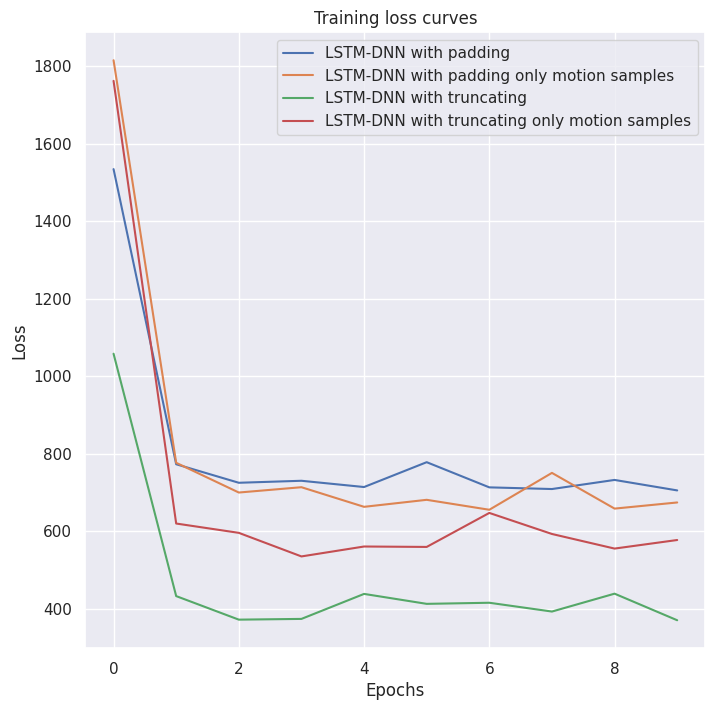

In [ ]:
# Plot the loss curves
plt.figure(figsize = (8, 8))

plt.plot(epoch_count, lstm_apppa_all, label = "LSTM-DNN with padding")
plt.plot(epoch_count, lstm_apppa_motion, label = "LSTM-DNN with padding only motion samples")

plt.plot(epoch_count, lstm_apptr_all, label = "LSTM-DNN with truncating")
plt.plot(epoch_count, lstm_apptr_motion, label = "LSTM-DNN with truncating only motion samples")

plt.title("Training loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Define the input shape
input_shape = (6489, 12)

# Define the number of output features
output_features = 14

# Create a custom DNN-LSTM model
class DNN_LSTMModel(nn.Module):
    def __init__(self, input_shape, output_features):
        super().__init__()
        self.relu = nn.ReLU()
        self.drop20 = nn.Dropout(0.2)
        self.drop50 = nn.Dropout(0.5)
        self.layer1 = nn.Linear(in_features = input_shape[1], out_features = 128)
        self.layer2 = nn.Linear(in_features = 128, out_features = 256)
        self.layer3 = nn.Linear(in_features = 256, out_features = 1024)
        self.layer4 = nn.Linear(in_features = 1024, out_features = 4096)
        self.layer5 = nn.Linear(in_features = 4096, out_features = 2048)
        self.layer6 = nn.Linear(in_features = 2048, out_features = 512)

        self.num_layers = 1

        self.lstm1 = nn.LSTM(512, 512, num_layers = self.num_layers, batch_first = True, dropout = 0.5)
        self.lstm2 = nn.LSTM(512, 256, num_layers = self.num_layers, bidirectional = True, batch_first = True, dropout = 0.2)
        self.lstm3 = nn.LSTM(512, 512, num_layers = self.num_layers, batch_first = True, dropout = 0.5)

        self.layer7 = nn.Linear(in_features = 512, out_features = 512)
        self.layer8 = nn.Linear(in_features = 512, out_features = 4096)
        self.layer9 = nn.Linear(in_features = 4096, out_features = 2048)
        self.layer10 = nn.Linear(in_features = 2048, out_features = 512)
        self.layer11 = nn.Linear(in_features = 512, out_features = 128)
        self.layer12 = nn.Linear(in_features = 128, out_features = output_features)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.drop20(x)
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.drop20(x)
        x = self.relu(self.layer5(x))
        x = self.drop50(x)
        x = self.relu(self.layer6(x))
        x = self.drop20(x)

        h0 = torch.zeros(self.num_layers, x.size(0), 512).to("cuda")
        c0 = torch.zeros(self.num_layers, x.size(0), 512).to("cuda")

        h1 = torch.zeros(self.num_layers * 2, x.size(0), 256).to("cuda")
        c1 = torch.zeros(self.num_layers * 2, x.size(0), 256).to("cuda")

        h2 = torch.zeros(self.num_layers, x.size(0), 512).to("cuda")
        c2 = torch.zeros(self.num_layers, x.size(0), 512).to("cuda")

        x, _ = self.lstm1(x, (h0, c0))
        x, _ = self.lstm2(x, (h1, c1))
        x, _ = self.lstm3(x, (h2, c2))

        x = self.relu(self.layer7(x))
        x = self.relu(self.layer8(x))
        x = self.drop50(x)
        x = self.relu(self.layer9(x))
        x = self.drop50(x)
        x = self.relu(self.layer10(x))
        x = self.relu(self.layer11(x))
        x = self.drop20(x)
        x = self.layer12(x)

        return (x)

In [ ]:
# Instantiate the model
model = DNN_LSTMModel(input_shape, output_features).to('cuda')

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# Load your input and output data
x_train = np.load("X_train_truncating.npy")
y_train = np.load("y_train_truncating.npy")

# Convert the data to PyTorch tensors
x_train = torch.tensor(x_train).float()
y_train = torch.tensor(y_train).float()

train_data = TensorDataset(x_train, y_train)

batch_size = 4
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
print(len(train_loader))

Dlstm_apptr_all = []
epoch_count = []

# Train the model for 10 epochs
for epoch in range(10):
    train_loss = 0
    for x_train, y_train in train_loader:

        x_train, y_train = x_train.to('cuda'), y_train.to('cuda')

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(x_train)

        y_pred = y_pred.reshape(-1, 14).to('cuda')
        y_train = y_train.reshape(-1, 14).to('cuda')

        # Compute the loss
        loss = criterion(y_pred, y_train)
        train_loss += loss

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()
    train_loss /= len(train_loader)

    # Print the loss
    print(f'Epoch: {epoch+1}, Loss: {train_loss:.4f}')
    Dlstm_apptr_all.append(train_loss.cpu().detach().numpy())
    epoch_count.append(epoch)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


51
Epoch: 1, Loss: 771.4322
Epoch: 2, Loss: 436.3219
Epoch: 3, Loss: 411.7662
Epoch: 4, Loss: 448.3192
Epoch: 5, Loss: 415.3779
Epoch: 6, Loss: 417.0670
Epoch: 7, Loss: 393.6595
Epoch: 8, Loss: 462.2288
Epoch: 9, Loss: 416.4925
Epoch: 10, Loss: 398.4944


In [ ]:
# # Define the input shape
# input_shape = (6498, 12) # (sequence lenght, input size)

# # Define the number of output features
# output_features = 14

# # Create a custom LSTM-CNN model
# class LSTMCNNModel(nn.Module):
#     def __init__(self, input_shape, output_features):
#         super(LSTMCNNModel, self).__init__()
#         self.conv1 = nn.Conv1d(input_shape[1], 64, kernel_size=3, padding=1)
#         self.lstm = nn.LSTM(64, 128)
#         self.fc1 = nn.Linear(input_shape[0] * 128, 4096) # 831744 = 6498 * 128
#         self.fc2 = nn.Linear(4096, 512)
#         self.fc3 = nn.Linear(512, output_features)

#     def forward(self, x):    # the shape of x is (batch, seq_len, input_size)

#         # the input channels are the second dimension and the sequence length is the third dimension
#         x = x.transpose(1, 2) # (batch, input_size, seq_len) for signals
#         x = self.conv1(x)     # (N, C, L)
#         x = x.transpose(1, 2) # (batch, seq_len, input_size)
#         x, _ = self.lstm(x)
#         x = x.transpose(0, 1)
#         # x = x.view(x.size(0), -1).contiguous()
#         x = x.reshape(x.shape[0], -1)
#         x = self.fc1(x)
#         x = self.fc2(x)
#         x = self.fc3(x)
#         return x

In [ ]:
# Define the input shape
input_shape = (6498, 12) # (sequence lenght, input size)

# Define the number of output features
output_features = 14

# Create a custom CNN model
class CNN_LSTM_Model(nn.Module):
    def __init__(self, input_shape, output_features):
        super(CNN_LSTM_Model, self).__init__()
        self.conv1 = nn.Conv1d(input_shape[1], 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(32, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(128, 512, kernel_size=3, padding=1)

        self.num_layers = 1

        self.lstm1 = nn.LSTM(512, 512, num_layers = self.num_layers, batch_first = True, dropout = 0.5)
        self.lstm2 = nn.LSTM(512, 256, num_layers = self.num_layers, bidirectional = True, batch_first = True, dropout = 0.2)
        self.lstm3 = nn.LSTM(512, 512, num_layers = self.num_layers, batch_first = True, dropout = 0.5)

        self.fc_h1 = nn.Linear(512,  512)
        self.fc_h2 = nn.Linear(512, 2048)
        self.fc_h3 = nn.Linear(2048, 4096)
        self.fc_h4 = nn.Linear(4096, 4096)
        self.fc_h5 = nn.Linear(4096, 4096)
        self.fc_h6 = nn.Linear(4096, 1024)
        self.fc_h7 = nn.Linear(1024, 256)
        self.fc = nn.Linear(256, output_features)
        self.relu = nn.ReLU()

    def forward(self, x):                                                       # (batch, seq_len, input_size)
        x = x.transpose(1, 2)                                                   # (batch, input_size, seq_len)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)                                                       # (batch, seq_len, input_size)

        x = x.transpose(1, 2)

        h0 = torch.zeros(self.num_layers, x.size(0), 512).to("cuda")
        c0 = torch.zeros(self.num_layers, x.size(0), 512).to("cuda")

        h1 = torch.zeros(self.num_layers * 2, x.size(0), 256).to("cuda")
        c1 = torch.zeros(self.num_layers * 2, x.size(0), 256).to("cuda")

        h2 = torch.zeros(self.num_layers, x.size(0), 512).to("cuda")
        c2 = torch.zeros(self.num_layers, x.size(0), 512).to("cuda")

        x, _ = self.lstm1(x, (h0, c0))
        x, _ = self.lstm2(x, (h1, c1))
        x, _ = self.lstm3(x, (h2, c2))

        x = self.relu(self.fc_h1(x))
        x = self.relu(self.fc_h2(x))
        x = self.relu(self.fc_h3(x))
        x = self.relu(self.fc_h4(x))
        x = self.relu(self.fc_h5(x))
        x = self.relu(self.fc_h6(x))
        x = self.relu(self.fc_h7(x))
        x = self.fc(x)
        return x

model = CNN_LSTM_Model(input_shape, output_features).to('cuda')

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# Load your input and output data
x_train = np.load("X_train_truncating.npy")
y_train = np.load("y_train_truncating.npy")

# Convert the data to PyTorch tensors
x_train = torch.tensor(x_train).float()
y_train = torch.tensor(y_train).float()

train_data = TensorDataset(x_train, y_train)

batch_size = 4
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
print(len(train_loader))

cnn_app = []
epoch_count = []

# Train the model for 10 epochs
for epoch in range(10):
    train_loss = 0
    for x_train, y_train in train_loader:

        x_train, y_train = x_train.to('cuda'), y_train.to('cuda')

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(x_train)

        y_pred = y_pred.reshape(-1, 14).to('cuda')
        y_train = y_train.reshape(-1, 14).to('cuda')

        # Compute the loss
        loss = criterion(y_pred, y_train)
        train_loss += loss

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()
    train_loss /= len(train_loader)

    # Print the loss
    print(f'Epoch: {epoch+1}, Loss: {train_loss:.4f}')
    cnn_app.append(train_loss.cpu().detach().numpy())
    epoch_count.append(epoch)

51
Epoch: 1, Loss: 1307.1506
Epoch: 2, Loss: 423.6025
Epoch: 3, Loss: 381.0266
Epoch: 4, Loss: 393.1151
Epoch: 5, Loss: 407.5837
Epoch: 6, Loss: 391.7102
Epoch: 7, Loss: 395.5598
Epoch: 8, Loss: 368.1223
Epoch: 9, Loss: 361.0181
Epoch: 10, Loss: 362.5240


In [ ]:
# Define the input shape
input_shape = (6498, 12) # (sequence lenght, input size)

# Define the number of output features
output_features = 14

# Create a custom CNN model
class CNN_LSTM_CNN_Model(nn.Module):
    def __init__(self, input_shape, output_features):
        super(CNN_LSTM_CNN_Model, self).__init__()
        self.conv1 = nn.Conv1d(input_shape[1], 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(32, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(128, 512, kernel_size=3, padding=1)
        self.conv4 = nn.Conv1d(512, 1024, kernel_size=3, padding=1)
        self.conv5 = nn.Conv1d(1024, 2048, kernel_size=3, padding=1)

        self.num_layers = 1

        self.lstm1 = nn.LSTM(2048, 512, num_layers = self.num_layers, batch_first = True, dropout = 0.5)
        self.lstm2 = nn.LSTM(512, 256, num_layers = self.num_layers, bidirectional = True, batch_first = True, dropout = 0.2)
        self.lstm3 = nn.LSTM(512, 512, num_layers = self.num_layers, batch_first = True, dropout = 0.5)
        self.lstm4 = nn.LSTM(512, 512, num_layers = self.num_layers, batch_first = True, dropout = 0.5)

        self.conv6 = nn.Conv1d(512, 2048, kernel_size=3, padding=1)
        self.conv7 = nn.Conv1d(2048, 4096, kernel_size=3, padding=1)
        self.conv8 = nn.Conv1d(4096, 4096, kernel_size=3, padding=1)
        self.conv9 = nn.Conv1d(4096, 2048, kernel_size=3, padding=1)
        self.conv10 = nn.Conv1d(2048, 512, kernel_size=3, padding=1)
        self.conv11 = nn.Conv1d(512, 128, kernel_size=3, padding=1)
        self.conv12 = nn.Conv1d(128, 14, kernel_size=3, padding=1)

        self.drop20 = nn.Dropout(0.2)
        self.drop50 = nn.Dropout(0.5)

        self.relu = nn.ReLU()

    def forward(self, x):                                                       # (batch, seq_len, input_size)
        x = x.transpose(1, 2)                                                   # (batch, input_size, seq_len)
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.drop20(x)
        x = self.relu(self.conv3(x))                                            # (batch, seq_len, input_size)
        x = self.relu(self.conv4(x))
        x = self.drop50(x)
        x = self.relu(self.conv5(x))

        x = x.transpose(1, 2)

        h0 = torch.zeros(self.num_layers, x.size(0), 512).to("cuda")
        c0 = torch.zeros(self.num_layers, x.size(0), 512).to("cuda")

        h1 = torch.zeros(self.num_layers * 2, x.size(0), 256).to("cuda")
        c1 = torch.zeros(self.num_layers * 2, x.size(0), 256).to("cuda")

        h2 = torch.zeros(self.num_layers, x.size(0), 512).to("cuda")
        c2 = torch.zeros(self.num_layers, x.size(0), 512).to("cuda")

        h3 = torch.zeros(self.num_layers, x.size(0), 512).to("cuda")
        c3 = torch.zeros(self.num_layers, x.size(0), 512).to("cuda")

        x, _ = self.lstm1(x, (h0, c0))
        x, _ = self.lstm2(x, (h1, c1))
        x, _ = self.lstm3(x, (h2, c2))
        x, _ = self.lstm4(x, (h3, c3))

        x = x.transpose(1, 2)

        x = self.relu(self.conv6(x))
        x = self.relu(self.conv7(x))
        x = self.drop50(x)
        x = self.relu(self.conv8(x))
        x = self.relu(self.conv9(x))
        x = self.drop50(x)
        x = self.relu(self.conv10(x))
        x = self.drop20(x)
        x = self.relu(self.conv11(x))
        x = self.relu(self.conv12(x))

        x = x.transpose(1, 2)

        return x

model = CNN_LSTM_CNN_Model(input_shape, output_features).to('cuda')

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

# Load your input and output data
x_train = np.load("X_train_truncating.npy")
y_train = np.load("y_train_truncating.npy")

# Convert the data to PyTorch tensors
x_train = torch.tensor(x_train).float()
y_train = torch.tensor(y_train).float()

train_data = TensorDataset(x_train, y_train)

batch_size = 4
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
print(len(train_loader))

cnn_lstm_cnn_app = []
epoch_count = []

# Train the model for 10 epochs
for epoch in range(10):
    train_loss = 0
    for x_train, y_train in train_loader:

        x_train, y_train = x_train.to('cuda'), y_train.to('cuda')

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(x_train)

        y_pred = y_pred.reshape(-1, 14).to('cuda')
        y_train = y_train.reshape(-1, 14).to('cuda')

        # Compute the loss
        loss = criterion(y_pred, y_train)
        train_loss += loss

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()
    train_loss /= len(train_loader)

    # Print the loss
    print(f'Epoch: {epoch+1}, Loss: {train_loss:.4f}')
    cnn_lstm_cnn_app.append(train_loss.cpu().detach().numpy())
    epoch_count.append(epoch)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


51
Epoch: 1, Loss: 2686.7209
Epoch: 2, Loss: 448.2603
Epoch: 3, Loss: 352.4034
Epoch: 4, Loss: 353.3084
Epoch: 5, Loss: 349.9145
Epoch: 6, Loss: 356.2378
Epoch: 7, Loss: 351.2652
Epoch: 8, Loss: 349.5940
Epoch: 9, Loss: 345.2935
Epoch: 10, Loss: 349.8111


## We can try some manifold methods to represent the input data

In [ ]:
# Prepare the data for training

# Merge Excersice 1 and 2
X_train = pd.concat([emg1, emg2])

print(X_train.shape)

X_test1 = X_train.iloc[:200000,:]
X_test2 = X_train.iloc[-200000:,:]
X_test = pd.concat([X_test1, X_test2])

X_train = X_train.iloc[200000:,:].iloc[:-200000,:]

print(X_train.shape)
print(X_test.shape)

# Convert the Dataframe to Tensor
train = torch.tensor(X_train.values.astype(np.float32))
test = torch.tensor(X_test.values.astype(np.float32))

# the input is the same as the output
train_data = TensorDataset(train, train)
test_data = TensorDataset(test, test)

batch_size = 400000
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

(4361620, 12)
(3961620, 12)
(400000, 12)


In [ ]:
class my_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.relu = nn.ReLU()
        self.layer1 = nn.Linear(in_features = 12, out_features = 256)
        self.layer2 = nn.Linear(in_features = 256, out_features = 128)
        self.layer3 = nn.Linear(in_features = 128, out_features = 64)
        self.layer4 = nn.Linear(in_features = 64, out_features = 2)
        self.layer5 = nn.Linear(in_features = 2, out_features = 64)
        self.layer6 = nn.Linear(in_features = 64, out_features = 128)
        self.layer7 = nn.Linear(in_features = 128, out_features = 256)
        self.layer8 = nn.Linear(in_features = 256, out_features = 12)

        self.encoder = nn.Sequential(
            self.layer1,
            self.relu,
            self.layer2,
            self.relu,
            self.layer3,
            self.relu,
            self.layer4,
        )
        self.decoder = nn.Sequential(
            self.relu,
            self.layer5,
            self.relu,
            self.layer6,
            self.relu,
            self.layer7,
            self.relu,
            self.layer8,
            self.relu,
        )

    def forward(self, inp):
        x = self.encoder(inp)
        x = self.decoder(x)
        return (x)

device0 = 'cuda'

# Build and define your model
model = my_model()
model.to(device0)

# Define the Loss function and the Optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params = model.parameters())

# Specify the number of epochs
epochs = 10

# Instantiate lists to save the loss values during the training process
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

    train_loss = 0
    for train_x, train_y in train_loader:

        train_x, train_y = train_x.to(device0), train_y.to(device0)
        # Training mode
        model.train()

        # Feedforward
        y_pred = model(train_x)

        # At start of each Epoch
        optimizer.zero_grad()

        # Calculate the loss function
        loss = loss_fn(y_pred, train_y)
        train_loss += loss

        # Do the back probagation and update the parameters
        loss.backward()
        optimizer.step()

    train_loss /= len(train_loader)

    # Evaluation mode
    model.eval()

    loss_test = 0
    with torch.inference_mode():
        for test_x, test_y in test_loader:
            test_x, test_y = test_x.to(device0), test_y.to(device0)

            # Feedforward again for the evaluation phase
            y_pred_test = model(test_x)

            # Calculate the loss for the test dataset
            loss_test += loss_fn(y_pred_test, test_y)

        loss_test /= len(test_loader)

    # Append loss values for the training process
    train_loss_values.append(loss.cpu().detach().numpy())
    test_loss_values.append(loss_test.cpu().detach().numpy())
    epoch_count.append(epoch)
    print(f"Epoch : {epoch + 1} | train_Loss: {loss} | test_Loss: {loss_test}")

Epoch : 1 | train_Loss: 7.136820556752355e-08 | test_Loss: 1.2754732825470683e-09
Epoch : 2 | train_Loss: 1.4395392655686123e-09 | test_Loss: 1.2754731715247658e-09
Epoch : 3 | train_Loss: 1.426638474022468e-09 | test_Loss: 1.2754732825470683e-09
Epoch : 4 | train_Loss: 1.4343163323715657e-09 | test_Loss: 1.2754732825470683e-09
Epoch : 5 | train_Loss: 1.4183222374342108e-09 | test_Loss: 1.2754732825470683e-09
Epoch : 6 | train_Loss: 1.4423984229239295e-09 | test_Loss: 1.2754732825470683e-09
Epoch : 7 | train_Loss: 1.4282323101966199e-09 | test_Loss: 1.2754731715247658e-09
Epoch : 8 | train_Loss: 1.4252220514876512e-09 | test_Loss: 1.2754731715247658e-09
Epoch : 9 | train_Loss: 1.4069896359103495e-09 | test_Loss: 1.2754731715247658e-09
Epoch : 10 | train_Loss: 1.4222306665701012e-09 | test_Loss: 1.2754731715247658e-09


In [ ]:
e = torch.tensor(emg1.values.astype(np.float32))
coding = model.encoder(e.to('cuda'))
coding.shape

torch.Size([1808331, 2])

In [ ]:
cod = coding.cpu().detach().numpy()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


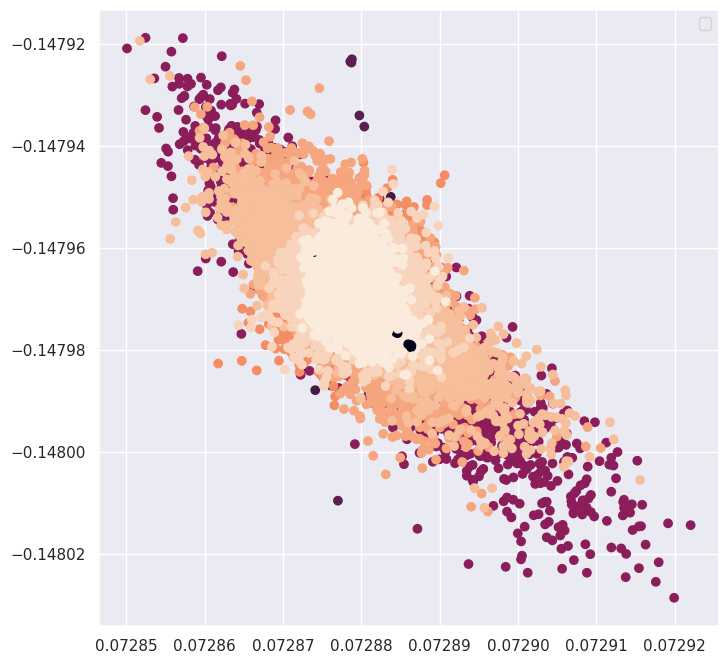

In [ ]:
# Plot the loss curves
plt.figure(figsize = (8, 8))
plt.scatter(cod.T[0], cod.T[1], c= np.array(stimulus1).reshape(-1,))
plt.legend()
plt.show()

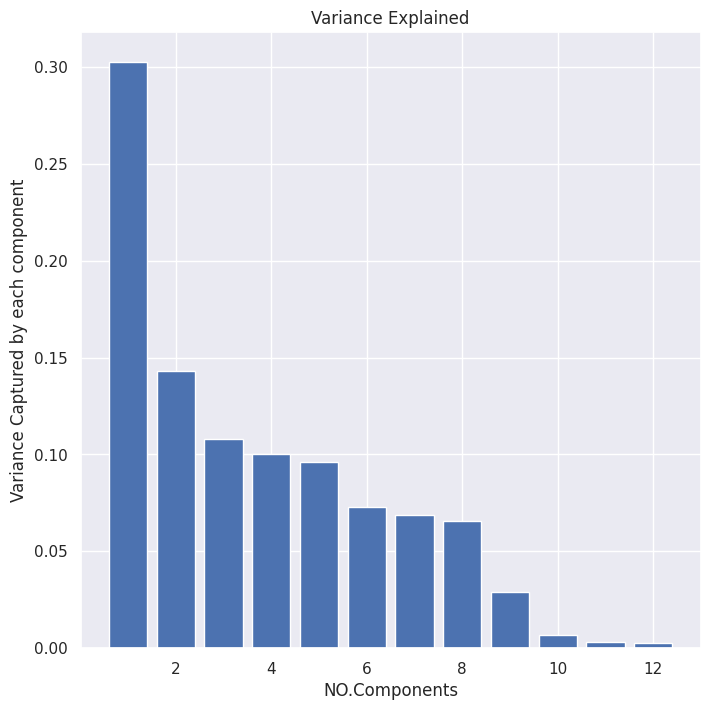

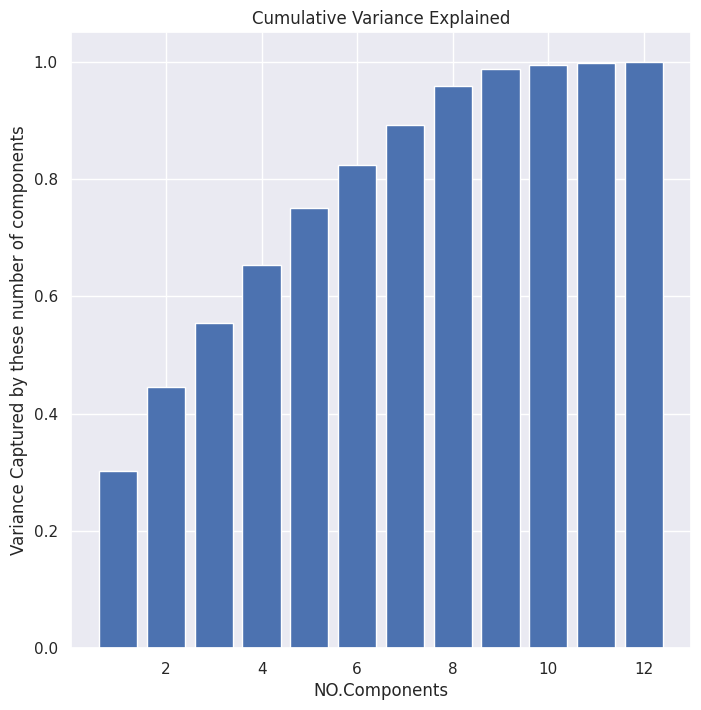

9
7


In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(emg1)
plt.figure(figsize = (8, 8))
plt.bar(range(1, len(pca.explained_variance_ratio_) +  1), pca.explained_variance_ratio_)
plt.xlabel("NO.Components")
plt.ylabel("Variance Captured by each component")
plt.title("Variance Explained")
plt.show()

var_cum = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize = (8, 8))
plt.bar(range(1, len(var_cum) + 1), var_cum)
plt.xlabel("NO.Components")
plt.ylabel("Variance Captured by these number of components")
plt.title("Cumulative Variance Explained")
plt.show()

print(sum(var_cum < 0.99))  # 9 component
print(sum(var_cum < 0.95))  # 7 component